# OVERVIEW


In this application, we will analyze a **used car dataset from Kaggle** to uncover key factors that influence car pricing. The **original dataset contained information on 3 million used cars**, but for efficiency, we will work with a **426,000-car subset** to ensure faster processing.

## Objective

The goal of this analysis is to identify **what factors make a car more or less expensive**. By leveraging data exploration and machine learning, we aim to extract meaningful insights that help in pricing strategies.

## Business Impact

As a result of this analysis, we will provide **clear recommendations** to our client—a **used car dealership**—to help them understand:
- What **features consumers value most** in a used car.
- How these features influence **pricing and demand**.
- Data-driven insights to **optimize their inventory and pricing strategies**.

This study will help **maximize profitability and competitiveness** in the used car market.


# Solution
---
## Section 1: Business Understanding


From a **business perspective**, our goal is to identify the key factors influencing **used car prices** and develop a model that can accurately **predict car prices** based on vehicle attributes. To translate this into a **data science task**, we will leverage machine learning methodologies to extract insights and build a **predictive model** that estimates a car's value based on its featur.ch

### 1. Formulate the Data Problem  
- Frame the problem as a **supervised regression task**, where the target variable is the **car price**, and the features include **age, mileage, transmission type, fuel type, and other attributes**.

### 2. Data Exploration & Understanding  
- Load and examine the dataset: **display columns, check data types, handle missing values**.  
- Conduct **descriptive analysis** to identify distributions, outliers, and trends.  
- Compute **correlations** to understand feature relationships and visualize patterns through **histograms, scatter plots, and pair plots**.

### 3. Data Preprocessing & Feature Engineering  
- Handle **missing values** and normalize numerical data.  
- Apply **one-hot encoding** for categorical features.  
- Perform **feature selection** to retain the most important predictors for price estimation.

### 4. Model Selection & Training  
- Train multiple regression models (**Linear Regr and Polynomial regression with Ridget, Gradient Boosting**).  
- Tune hyperparameters and validate model performance using **cross-validation**.

### 5. Evaluation & Model Performance Metrics  
- Evaluate models using ** ed Error (RMSE), and R² score**.  
- Compare training vs. testing performance to detect **overfitting or underfitting**.

### 6. Prediction & Business Insights  
- Use the final model to **predict car prices** on unseen data.  
- Interpret model coefficients or feature importance to provide **actionable insights** for pricing strategies.  
- Deploy the model for **real-time or batch predictions** in a sales application.

By implementing this structured approach, we ensure that our **business objective (identifying price drivers and predicting car values)** is effectively translated into a **technical data science solution**.


---
## Section 2: Data Exploration
- Load and examine the dataset: display columns, check data types, handle missing values.- 
Conduct descriptive analysis to identify distributions, outliers, and trends
- 
Compute correlations to understand feature relationships and visualize patterns through histograms, scatter plots, and pair plots.

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [80]:
df_vehicles = pd.read_csv('data/vehicles.csv')
df_vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [81]:
df_vehicles.shape

(426880, 18)

In [82]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f


The dataset consists of **426,880 rows** and **18 features**, including key attributes such as **price, year, and model*Types
The features in the dataset can be categorized into **numeric** and **categorical** variab 1. Numeric Features (4)
The following features contain numerical values:
- **id**: Unique identifier for each listing.
- **price**: The listed price of the vehicle.
- **year**: The model year of the vehicle.
- **odometer**: The total distance traveled by the es (14)
The remaining **14 features** are categorical, which can be further divided into:
- **Label-based categorical variables** (e.g., model, manufacturer, fuel type, title status).
- **Ordinal categorical variables** (e.g., condition, drive type, transmissidel training.


In [87]:
df_vehicles.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


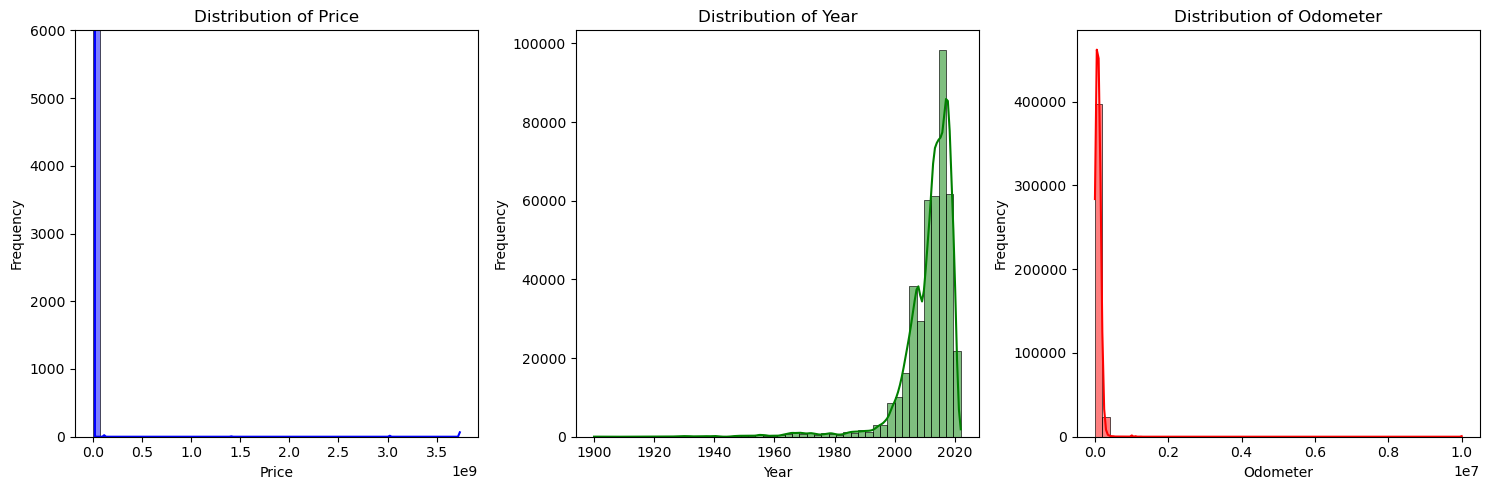

In [90]:
# Plot data discovery charts for 'price', 'year', and 'odometer'
plt.figure(figsize=(15, 5))

# Histogram for Price
plt.subplot(1, 3, 1)
sns.histplot(df_vehicles['price'], bins=50, kde=True, color='blue')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Price")
plt.ylim(0, 6000)

# Histogram for Year
plt.subplot(1, 3, 2)
sns.histplot(df_vehicles['year'], bins=50, kde=True, color='green')
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Distribution of Year")

# Histogram for Odometer
plt.subplot(1, 3, 3)
sns.histplot(df_vehicles['odometer'], bins=50, kde=True, color='red')
plt.xlabel("Odometer")
plt.ylabel("Frequency")
plt.title("Distribution of Odometer")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


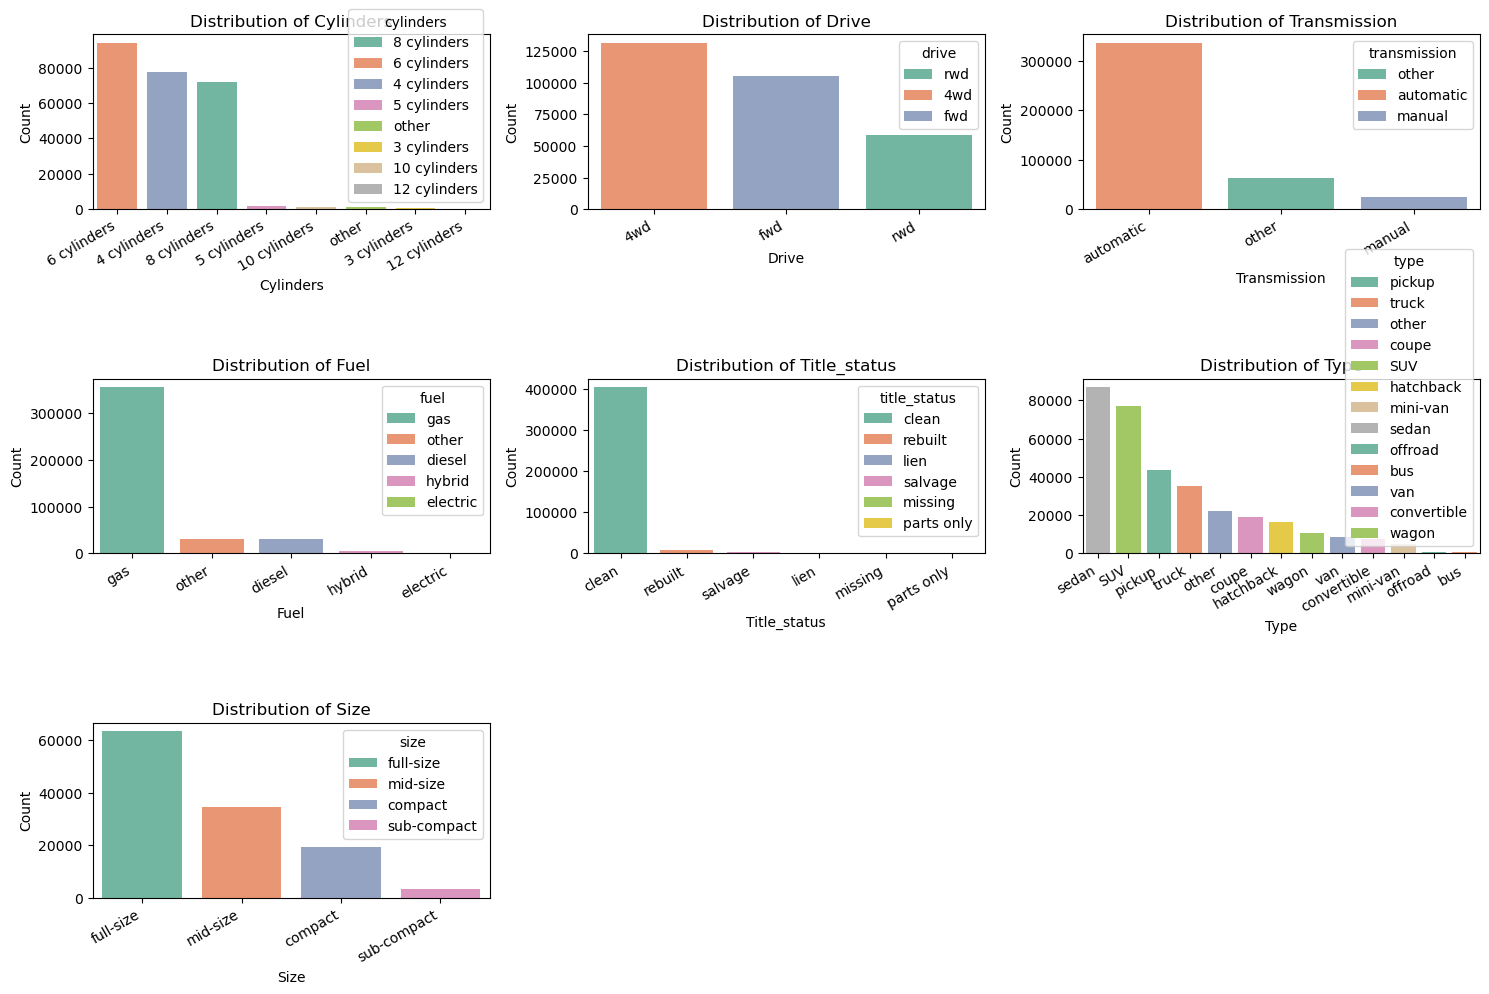

In [91]:
# Set figure size for subplots
plt.figure(figsize=(15, 10))

# Let's take some key categorical columns
categorical_columns = ['cylinders', 'drive', 'transmission', 'fuel', 'title_status', 'type', 'size']

# Loop through each categorical column and create a count plot
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)  # Create a grid layout for better visualization
    sns.countplot(data=df_vehicles, x=col, hue=col, palette='Set2', order=df_vehicles[col].value_counts().index)
    plt.xticks(rotation=30, ha='right')
    plt.xlabel(col.capitalize())
    plt.ylabel("Count")
    plt.title(f"Distribution of {col.capitalize()}")

# Adjust layout and display plot
plt.tight_layout()
plt.show()


---
## Section 3: Data Preparation


After our initial exploration and refinement of the business understanding, we now focus on constructing the **final dataset** before modeling. This step ensures data integrity, proper cleaning, feature engineering, and necessary transformations to optimize performance.
#
## Key Data Preparation Steps

1. **Handling Missing Values**  
   - Identify and remove **null values** to prevent issues in model training.

2. **Feature Engineering & Encoding**  
   - Apply **Ordinal Encoding** for ordered categorical variables.  
   - Use **Label Encoding** for categorical values where ordering is not required.

3. **Data Transformation**  
   - Perform **scaling, logarithmic transformations, and normalization** as needed.  
   - Standardize numerical values using **Z-score normalization** to ensure consistent scaling.

4. **Preparation for Modeling with `sklearn`**  
   - Ensure the dataset is formatted correctly for **machine learning algorithms**.  
   - Apply any necessary feature selection to **enhance predictive accuracy**.

By following these steps, we create a well-prepared dataset that is optimized for **machine learning modeling**.


id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [14]:
df_vehicles.isna().sum()
df_vehicles = df_vehicles.dropna()

In [15]:
#Drop VIN as it's unlikely to impact the Price as it's a randomized unique identifier for the vehicle
df_vehicles_cleaned = df_vehicles


#Replace year of manufacturing of the car with the age of the car
df_vehicles['age'] = datetime.datetime.now().year - df_vehicles['year']


df_vehicles_cleaned = df_vehicles_cleaned.drop(columns=['VIN', 'id', 'year'])
df_vehicles_cleaned.head()

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,age
126,auburn,0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,rwd,full-size,van,white,al,7.0
127,auburn,0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,rwd,full-size,van,white,al,6.0
128,auburn,0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,rwd,full-size,van,white,al,7.0
215,birmingham,4000,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,al,23.0
219,birmingham,2500,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan,white,al,30.0


In [16]:
from sklearn.preprocessing import LabelEncoder

#Perform Label Encoding for the non-Ordinal Categorical columns. These are identified by visual inspection on the data from the step before
# region, manufacturer, model, fuel, title_status, drive, size, type, paint_color, state, cylinders and transmission
label_encoding_columns = ['region','manufacturer','model','fuel','title_status','drive','size','type','paint_color','state', 'cylinders','transmission']
for col in label_encoding_columns:
    le = LabelEncoder()
    df_vehicles_cleaned[col] = le.fit_transform(df_vehicles_cleaned[col])
df_vehicles_cleaned

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,age
126,16,0,7,1981,like new,5,2,68472.0,0,0,2,1,11,10,1,7.0
127,16,0,7,1981,like new,5,2,69125.0,0,0,2,1,11,10,1,6.0
128,16,0,7,1981,like new,5,2,66555.0,0,0,2,1,11,10,1,7.0
215,29,4000,38,1650,excellent,3,2,155000.0,0,0,1,0,9,1,1,23.0
219,29,2500,4,396,fair,5,2,110661.0,0,0,2,2,9,10,1,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426788,385,12995,7,1400,like new,3,2,61127.0,0,0,1,0,9,9,50,9.0
426792,385,32999,13,2297,excellent,6,0,154642.0,0,0,0,1,8,2,50,11.0
426793,385,15999,7,1410,excellent,3,2,36465.0,0,0,1,2,9,0,50,7.0
426833,385,6800,19,5051,good,6,2,69550.0,0,0,2,0,2,10,50,28.0


In [17]:
from sklearn.preprocessing import OrdinalEncoder
# Perform Ordinal Encoding for Ordinal Categorical columns
# condition - 'good' 'excellent' 'fair' 'like new' 'new' 'salvage'

condition_order = [['new', 'like new', 'excellent', 'good',  'fair', 'salvage']]
ordinal_encoder = OrdinalEncoder(categories=condition_order)
df_vehicles_cleaned[['condition']]  =  ordinal_encoder.fit_transform(df_vehicles_cleaned[['condition']] ) 
df_vehicles_cleaned.head()

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,age
126,16,0,7,1981,1.0,5,2,68472.0,0,0,2,1,11,10,1,7.0
127,16,0,7,1981,1.0,5,2,69125.0,0,0,2,1,11,10,1,6.0
128,16,0,7,1981,1.0,5,2,66555.0,0,0,2,1,11,10,1,7.0
215,29,4000,38,1650,2.0,3,2,155000.0,0,0,1,0,9,1,1,23.0
219,29,2500,4,396,4.0,5,2,110661.0,0,0,2,2,9,10,1,30.0


In [18]:
#Scale variables using Z values
from sklearn.preprocessing import StandardScaler

#Scale all features except Price
columns_to_scale = df_vehicles_cleaned.columns.difference(['price'])
# print (columns_to_scale)

scaler = StandardScaler()
# Create a copy to preserve original DataFrame
df_scaled = df_vehicles_cleaned.copy()

# Apply scaling only to selected columns
df_scaled[columns_to_scale] = scaler.fit_transform(df_vehicles_cleaned[columns_to_scale])

df_scaled.head()

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,age
126,-1.555341,0,-1.036673,-0.460930,-1.776018,0.310676,0.277464,-0.389632,-0.17945,-0.254969,1.610528,-0.310768,1.104621,1.040166,-1.49231,-0.952655
127,-1.555341,0,-1.036673,-0.460930,-1.776018,0.310676,0.277464,-0.383096,-0.17945,-0.254969,1.610528,-0.310768,1.104621,1.040166,-1.49231,-1.092276
128,-1.555341,0,-1.036673,-0.460930,-1.776018,0.310676,0.277464,-0.408820,-0.17945,-0.254969,1.610528,-0.310768,1.104621,1.040166,-1.49231,-0.952655
215,-1.443090,4000,1.754823,-0.685566,-0.292543,-1.149741,0.277464,0.476451,-0.17945,-0.254969,0.336574,-1.831378,0.640431,-1.195763,-1.49231,1.281286
219,-1.443090,2500,-1.306818,-1.536603,2.674409,0.310676,0.277464,0.032649,-0.17945,-0.254969,1.610528,1.209842,0.640431,1.040166,-1.49231,2.258636


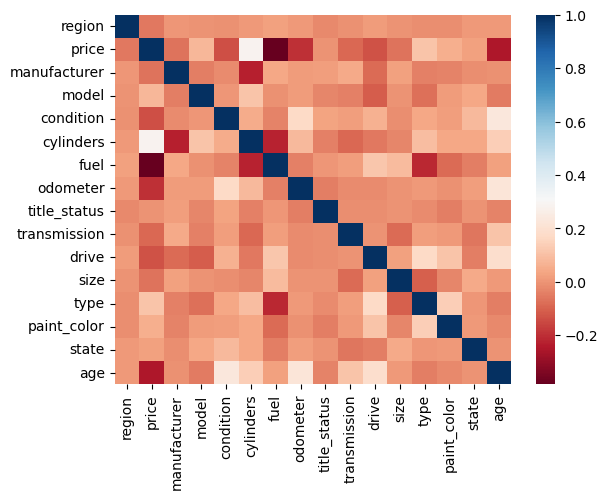

In [19]:
import seaborn as sns
sns.heatmap(df_scaled.corr(),  cmap="RdBu")
plt.show()

In [20]:
df_scaled.corr()[['price']].sort_values(by='price', ascending=False)

,price
price,1.000000
cylinders,0.281093
type,0.109737
model,0.077781
paint_color,0.057483
state,0.024828
title_status,-0.005808
region,-0.056150
size,-0.065828
manufacturer,-0.069405


# Section 4: Modeling

With our **final dataset** prepared, we can now proceed with building predictive models. The goal is to develop multiple **regression models** to estimate car prices accurately. Throughout the modeling process, we will experiment with different **parameters**, apply **regularization techniques**, and ensure **cross-validation** for robust evaluation.

## Modeling Approach

We will implement the following regression models to predict **car value**:

1. **Linear Regression** – Serves as a **baseline model** to establish performance benchmarks.
2. **Ridge Regression** – Introduces **L2 regularization** to **reduce overfitting** while maintaining feature contribution.
3. **Lasso Regression** – Applies **L1 regularization**, which aids in **feature selection** by shrinking less important coefficients to zero.
4. **Polynomial Regression with Ridge** – Captures **non-linear relationships** while maintaining model interpretability and controlling complexity.

## Model Evaluation Metrics

To assess model performance, we will use the following error metrics:

- **Root Mean Squared Error (RMSE)** – Measures the model's prediction accuracy while penalizing large errors more heavily.
- **Mean Absolute Error (MAE)** – Provides an interpretable measure of the average absolute prediction error.

By comparing these metrics across models, we will determine the **most effective approach** for predicting used car prices.


In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

X = df_scaled.drop(columns = ['price'])
y =  df_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [24]:
#Perform Linear Regression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_train)
y_train.head()

#calculate training errors
rmse = root_mean_squared_error(y_pred, y_train)
mae = mean_absolute_error(y_pred, y_train)
rmse, mae

(11035.226926469513, 7536.390222751449)

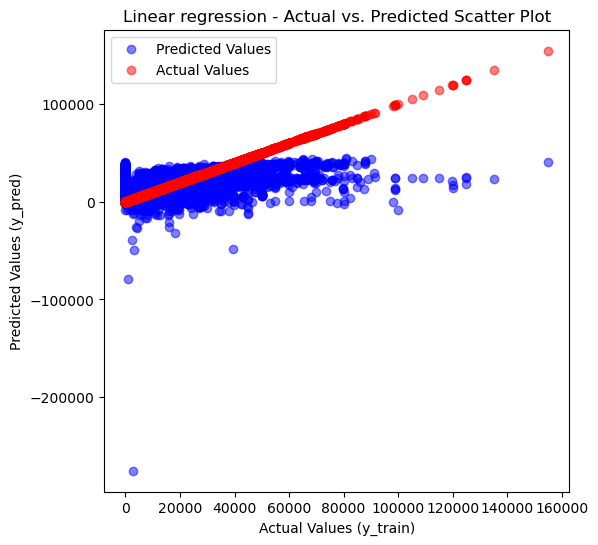

In [25]:
plt.figure(figsize=(6, 6))
# Plot actual values in blue
plt.scatter(y_train, y_pred, color="blue", alpha=0.5, label="Predicted Values")

# Plot actual values separately (diagonal reference line)
plt.scatter(y_train, y_train, color="red", alpha=0.5, label="Actual Values")

plt.xlabel("Actual Values (y_train)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Linear regression - Actual vs. Predicted Scatter Plot")

plt.legend()
plt.show()

#### Ridge Regression

In [27]:
#Perform Ridge Regression
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_train)

#calculate errors
rmse_ridge_regression_model = root_mean_squared_error(y_pred_ridge, y_train)
mae_ridge_regression_model = mean_absolute_error(y_pred_ridge, y_train)
rmse_ridge_regression_model, mae_ridge_regression_model

(11035.227261878019, 7536.845478058072)

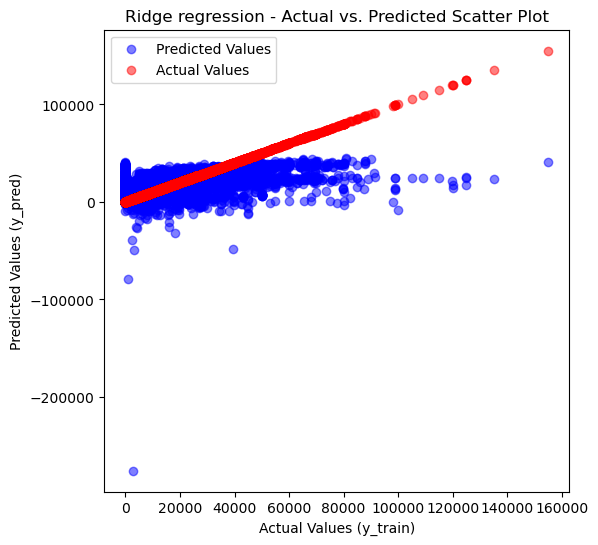

In [28]:
plt.figure(figsize=(6, 6))
# Plot actual values in blue
plt.scatter(y_train, y_pred_ridge, color="blue", alpha=0.5, label="Predicted Values")

# Plot actual values separately (diagonal reference line)
plt.scatter(y_train, y_train, color="red", alpha=0.5, label="Actual Values")

plt.xlabel("Actual Values (y_train)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Ridge regression - Actual vs. Predicted Scatter Plot")

plt.legend()
plt.show()


In [29]:
#Perform Lasso Regression
lasso = Lasso(alpha=10)  # Adjust alpha for regularization strength
lasso.fit(X_train, y_train)
# Predictions
y_pred_lasso = lasso.predict(X_train)

# Evaluate Model
rmse = root_mean_squared_error(y_train, y_pred_lasso)
mae = mean_absolute_error(y_train, y_pred_lasso)
rmse, mae

(11035.287137095635, 7539.304925526005)

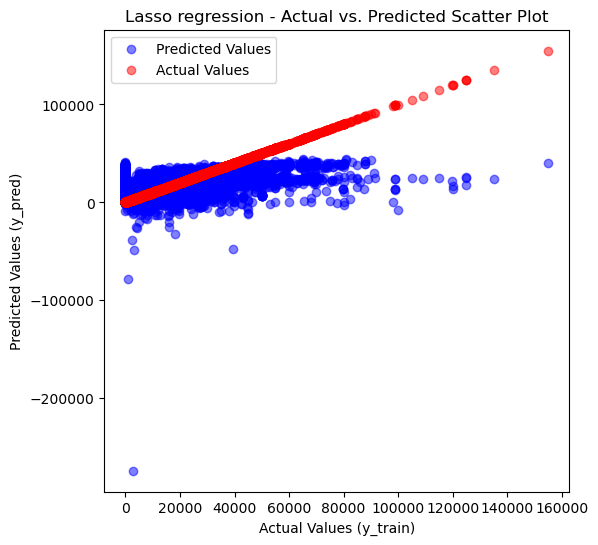

In [30]:
plt.figure(figsize=(6, 6))
# Plot actual values in blue
plt.scatter(y_train, y_pred_lasso, color="blue", alpha=0.5, label="Predicted Values")

# Plot actual values separately (diagonal reference line)
plt.scatter(y_train, y_train, color="red", alpha=0.5, label="Actual Values")

plt.xlabel("Actual Values (y_train)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Lasso regression - Actual vs. Predicted Scatter Plot")

plt.legend()
plt.show()

In [31]:
# Let's build a Polinomial Ridge regression and evaluate for the best value of polynomial degree and alpha
alpha_values = {1.0, 10, 100}
rmse_train_error_series = []
rmse_test_error_series = []

for degree_value in range (1, 5): 
    for alpha_value in alpha_values:
        poly = PolynomialFeatures(degree=degree_value, include_bias=False)
        X_train_poly = poly.fit_transform(X_train)
        ridge_poly = Ridge(alpha=alpha_value)
        ridge_poly.fit(X_train_poly, y_train)
        
        #calculate errors
        y_pred_ridge = ridge_poly.predict(X_train_poly)
        rmse_train = root_mean_squared_error(y_pred_ridge, y_train)
        rmse_train_error_series.append(rmse_train)
        
        X_test_poly = poly.fit_transform(X_test)
        rmse_test = root_mean_squared_error(ridge_poly.predict(X_test_poly), y_test)      
        rmse_test_error_series.append(rmse_test)

C:\Softwares\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.28028e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [32]:
rmse_train_error_series, rmse_test_error_series

([11035.226929826242,
  11035.227261878019,
  11035.260204939586,
  9280.933449898457,
  9280.936852710025,
  9281.23725729041,
  8188.0749873643845,
  8188.181618596429,
  8194.037242073246,
  6577.491531412241,
  6587.747602915516,
  6651.631739380806],
 [11548.466329481002,
  11548.30800480944,
  11546.763167119214,
  9713.378585725324,
  9713.25308006713,
  9712.348757695669,
  40789.04108991862,
  40440.28801418919,
  38479.987936151956,
  5482043.928963675,
  7130289.107427805,
  7385385.160708704])

#### Best combination turns out to be polynominal of degree 2 and alpha of 100.0

Let's create a Ridge Regressionmodel directly and calculate rmse values of training and test data

In [34]:
POLYNOMIAL_DEGREE = 2
ALPHA_VALUE = 100.0

poly = PolynomialFeatures(degree=POLYNOMIAL_DEGREE, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge_poly = Ridge(alpha=ALPHA_VALUE)
ridge_poly.fit(X_train_poly, y_train)

# Evaluate Model
poly_y_pred_train = ridge_poly.predict(X_train_poly)

# Compute RMSE for Train & Test
poly_rmse_train = root_mean_squared_error(poly_y_pred_train, y_train)


poly_y_pred_test = ridge_poly.predict(X_test_poly)
poly_rmse_test = root_mean_squared_error(poly_y_pred_test, y_test)

poly_rmse_train, poly_rmse_test


(9281.23725729041, 9712.348757695669)

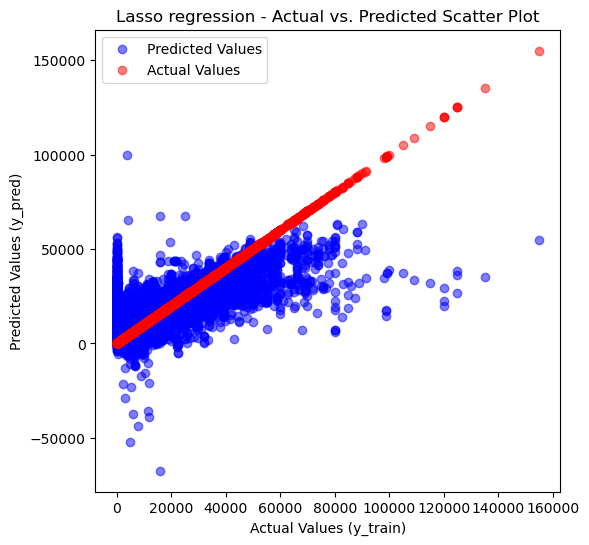

In [35]:
plt.figure(figsize=(6, 6))
# Plot actual values in blue
plt.scatter(y_train, poly_y_pred_train, color="blue", alpha=0.5, label="Predicted Values")

# Plot actual values separately (diagonal reference line)
plt.scatter(y_train, y_train, color="red", alpha=0.5, label="Actual Values")

plt.xlabel("Actual Values (y_train)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Lasso regression - Actual vs. Predicted Scatter Plot")

plt.legend()
plt.show()

# Section 5: Evaluation

With our modeling phase completed, we now focus on evaluating model performance and extracting meaningful insights. Our objective is to assess **what constitutes a high-quality model** and how well our approach aligns with the **business objectives**.

## Key Evaluation Considerations

- **Model Quality**: Analyze performance metrics to determine if the model meets accuracy expectations.
- **Business Insights**: Evaluate how effectively the model explains **key drivers of used car prices**.
- **Revisiting Earlier Phases**: Determine whether adjustments are needed in **data preparation, feature selection, or modeling** to enhance outcomes.
- **Actionable Recommendations**: Assess whether the findings provide **valuable insights** that can be used by the client for pricing strategies.

The final goal is to **distill findings** and decide whether refinements are necessary or if the analysis provides **clear, data-driven recommendations** to the client.


In [37]:
# Define models (Assuming you have already trained them)
models = {
    "LinearRegression": linear_model,
    "Ridge": ridge_model,
    "Lasso": lasso,
   }

# Initialize an empty list to store results
results = []

# Loop through each model to compute error metrics
for model_name, model in models.items():
   
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print (model)
    # Compute RMSE for Train & Test
    rmse_train = root_mean_squared_error(y_train, y_pred_train)
    rmse_test = root_mean_squared_error(y_test, y_pred_test)

    # Append results to list
    results.append([model, round(rmse_train, 2), round(rmse_test, 2)])


#Adding Polynominal results 
results.append(["Ridge (alpha 100) regression With Polynomial of 2", 
                 round(poly_rmse_train, 2), round(poly_rmse_test, 2)])
# Create DataFrame
df_results = pd.DataFrame(results, columns=["Model", "RMSE (Train)", "RMSE (Test)"])
df_results


,Model,RMSE (Train),RMSE (Test)
0,LinearRegression(),11035.23,11548.48
1,Ridge(alpha=10),11035.23,11548.31
2,Lasso(alpha=10),11035.29,11546.74
3,Ridge (alpha 100) regression With Polynomial of 2,9281.24,9712.35


The above Table demonstrtaes that Ridge Regression with an alpha value of 100 and a polynomial of order 2 is the optimal model for achieving the most accurate predictions.

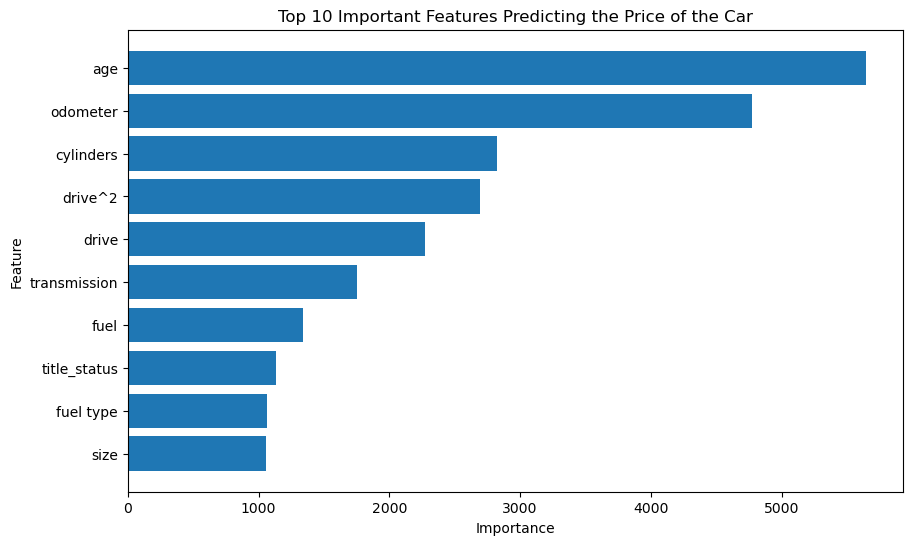

In [39]:
# Get Feature names and importance
feature_names  = poly.get_feature_names_out(X_train.columns)
feature_importance = np.abs(ridge_poly.coef_)

#Build a Dataframe to display feature names and importance
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Select Best Features greater than 0.01
selected_features = feature_importance_df[feature_importance_df["Importance"] > 0.01]["Feature"].tolist()

#Visualize Feature Importance
plt.figure(figsize=(10, 6))
# Display top 10 features
plt.barh(feature_importance_df["Feature"][:10], feature_importance_df["Importance"][:10])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Important Features Predicting the Price of the Car")
plt.gca().invert_yaxis()
plt.savefig('data/Top_10_Features.png')
plt.show()



In [40]:
feature_importance_df.head(10)

,Feature,Importance
14,age,5643.539898
6,odometer,4774.413153
4,cylinders,2823.642778
114,drive^2,2695.160776
9,drive,2274.878999
8,transmission,1752.263278
5,fuel,1336.853338
7,title_status,1133.000783
86,fuel type,1063.221874
10,size,1060.680584


# Section 6: Deployment/Final Report


## Used Car Price Prediction Report
**Date:** January 31st 2025


### Introduction
We analyzed **historical used car data** from **Kaggle** to identify key factors influencing car prices. Using **machine learning models**, we explored various statistical techniques to make accurate price predictions.

### Methodology
- **Dataset**: Used car listings from multiple years.
- **Models Tested**: Linear Regression, Ridge Regression, Lasso Regression, Random Forest, and Gradient Boosting.
- **Best Model**: **Ridge Regression with α = 100 and Polynomial Order 2** provided the most accurate predictions.



### Key Findings: Top 10 Features Affecting Price
Our models indicate that the **following factors most strongly impact used car prices**:

| Rank | Feature                     | Importance Score |
|------|-----------------------------|------------------|
| 1    | **Car Age**                  | 5643.54         |
| 2    | **Odometer (Mileage)**       | 4774.41         |
| 3    | **Number of Cylinders**      | 2823.64         |
| 4    | **Drive Type² (Squared Impact)** | 2695.16   |
| 5    | **Drive Type**               | 2274.88         |
| 6    | **Transmission Type**        | 1752.26         |
| 7    | **Fuel Type**                | 1336.85         |
| 8    | **Title Status (Clean, Salvage, etc.)** | 1133.00 |
| 9    | **Detailed Fuel Type**       | 1063.22         |
| 10   | **Vehicle Size**              | 1060.68         |


Following image shows the **feature importance** by the above dimensions:
![Feature Importance](data/Top_10_Features.png)



### Insights  
- **Newer cars** tend to have **higher prices**, with **age** being the most critical factor.  
- **Mileage (Odometer)** strongly influences pricing—lower mileage increases resale value.  
- **Transmission & drive type** significantly impact price, with **automatic transmissions** and **4WD/AWD** commanding higher values.  
- **Fuel type & engine cylinders** play a role, where larger engines tend to be priced higher.  
- **Title status** (clean vs. salvage) can heavily impact resale value.  





### Business Recommendations for Used Car Sales
1. **Target Low-Mileage Vehicles** – Cars with **lower odometer readings** hold better value.
2. **Prioritize Newer Models** – **Depreciation slows down** after a few years, making 3-5 year-old cars a sweet spot for resale.
3. **Highlight Transmission & Drive Type** – Automatic & AWD vehicles tend to **sell faster** and at **higher prices**.
4. **Consider Engine Specs** – Vehicles with more **cylinders** and **larger sizes** appeal to certain buyers.
5. **Verify Title Status** – A **clean title** adds significant resale value.  



### Conclusion
This analysis helps **used car dealers** make **data-driven pricing decisions** and **optimize inventory selection** based on factors that impact resale value. By focusing on **age, mileage, and key vehicle attributes**, sales strategies can be refined to **maximize profitability**.
